In [ ]:
# Hello! Welcome to my work and thanks to Locale for giving me this opportunity.
# How to read this work:
# Mostly I have tried to comment and explain what I am doing but in many places, I have coded something and the inference is written in bold just after the output. Please refer to them as well. I have also compiled the conclusions at the end.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("LocaleData.csv") # Loading the dataset

In [133]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:
data.shape

(43431, 19)

In [6]:
data.isnull().sum() #Finding total null values

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [7]:
long=data[data.travel_type_id==1]   #Long is for Long journey package
point=data[data.travel_type_id==2]  #For point-to-point package
hour=data[data.travel_type_id==3]  #Hourly basis package

In [8]:
long.shape

(1589, 19)

In [9]:
long.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
to_date                  85
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

In [10]:
point.shape

(34292, 19)

In [11]:
point.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [12]:
hour.shape

(7550, 19)

In [13]:
hour.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
to_date                2620
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

# Point-to-point Analysis

In [14]:
point.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [15]:
point.shape

(34292, 19)

In [16]:
point.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

#### >> Package_id, to_city_id is not available for any value in the point dataset,
#### >> from_city & to_date are not available for almost half of the dataset so it will be dangerous to make predictions based on this


In [17]:
#drop columns which are not applicable to point-to-point and columns with all nan values
point=point.drop(['package_id', 'from_city_id', 'to_city_id', 'to_date'], axis=1)

In [18]:
#Convert date and time to standard format
point.from_date = pd.to_datetime(point.from_date)
point.booking_created = pd.to_datetime(point.booking_created)
point.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0


In [19]:
point.dtypes #We see that from_date and booking time is now changed to datetime format

id                              int64
user_id                         int64
vehicle_model_id                int64
travel_type_id                  int64
from_area_id                  float64
to_area_id                    float64
from_date              datetime64[ns]
online_booking                  int64
mobile_site_booking             int64
booking_created        datetime64[ns]
from_lat                      float64
from_long                     float64
to_lat                        float64
to_long                       float64
Car_Cancellation                int64
dtype: object

In [20]:
point.time=point.from_date.dt.time   #Extracting time 
point.book=point.booking_created.dt.time


C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [21]:
point['diff'] = point['from_date'] - point['booking_created'] #Difference between booking time and the time when trip start
point['diff']=point['diff']/np.timedelta64(1,'m')
point

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,diff
0,132512,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,21.0
1,132513,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,395.0
2,132514,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,22.0
3,132515,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,66.0
4,132517,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,67.0
5,132518,17712,12,2,1021.0,1323.0,2013-01-01 22:30:00,0,0,2013-01-01 08:01:00,13.028530,77.546250,12.869805,77.653211,0,869.0
7,132520,22181,12,2,1192.0,832.0,2013-01-01 11:00:00,0,0,2013-01-01 09:39:00,12.976770,77.572700,12.880190,77.645580,0,81.0
9,132522,22184,12,2,516.0,376.0,2013-01-01 11:00:00,0,0,2013-01-01 09:49:00,13.005600,77.657990,12.902450,77.660810,0,71.0
10,132523,4941,12,2,150.0,776.0,2013-01-01 11:00:00,0,0,2013-01-01 09:55:00,12.897240,77.610650,13.015080,77.677960,0,65.0
11,132524,17037,12,2,455.0,1330.0,2013-01-01 12:45:00,0,0,2013-01-01 09:59:00,12.999874,77.678120,12.953434,77.706510,0,166.0


##### Now let us try to find relation between no of bookings and time

10    2411
11    2316
19    2238
20    2214
17    2167
16    2145
12    2137
15    2094
18    2083
14    1997
13    1938
22    1776
21    1758
9     1653
23    1306
8     1241
7      858
0      740
1      381
6      310
2      178
5      134
3      121
4       96
Name: booking_created, dtype: int64


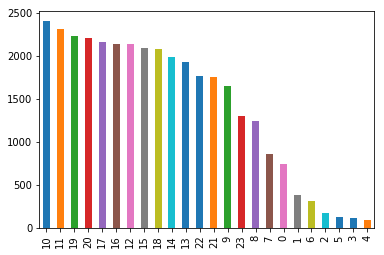

In [22]:
a=point.booking_created.dt.hour.value_counts() # Number of bookings made by time in hour
print(a)
a.plot(kind='bar')

### >> We make some inferences here that there are a few time hour sets when the bookings are at peak: 10.00-12.00 is a peak hour, 16.00-20.00 is another peak hour. So prices can be high at this time and at 01.00-7.00 prices can be minimum. We could devise some pricing scheme based on the time.
### Thus we can make a deduction of forming batch of timings on the basis of demand timings(Reason for this can be understood below as we will need to use these batches):
####   Night and Early morning (1.00-7.00)
####   Morning 1 (7.00-10.00)
####   Morning 2 (10.00-12.00)
####   Noon  ( 13.00-16.00)
####   Evening  (16.00-20.00)
####   Early night (20.00-00.00)

### -------
#### Now that we have looked at time wise bookings, let us look at area wise bookings

In [23]:
a=point.from_area_id.value_counts() #Count of from_Area_id
p=a.index
a

393.0     3375
571.0     1198
585.0      798
293.0      760
1384.0     599
142.0      573
1010.0     557
83.0       556
1096.0     409
1026.0     349
269.0      322
1371.0     313
58.0       312
625.0      293
689.0      283
1330.0     279
271.0      272
768.0      272
1068.0     267
1056.0     261
1017.0     249
363.0      233
1021.0     233
396.0      225
410.0      218
168.0      214
392.0      209
105.0      208
776.0      202
458.0      200
          ... 
1201.0       1
1345.0       1
1329.0       1
1127.0       1
1113.0       1
1277.0       1
1343.0       1
1092.0       1
733.0        1
549.0        1
1042.0       1
1158.0       1
921.0        1
1143.0       1
72.0         1
1352.0       1
1178.0       1
901.0        1
133.0        1
1117.0       1
185.0        1
79.0         1
1360.0       1
1253.0       1
1235.0       1
68.0         1
138.0        1
369.0        1
1252.0       1
384.0        1
Name: from_area_id, Length: 586, dtype: int64

#### >>This gives us an overall idea that in areas with different ids most bookings are made but let us make a closer analysis and  try to find out relation between area and time of booking


In [24]:
for i in range(0,586): # Loop over 586 areas to find relation between time and area
    z=point.from_date.dt.hour[point.from_area_id==p[i]].value_counts().idxmax()
    print(p[i],"-->",z,".00")

393.0 --> 23 .00
571.0 --> 17 .00
585.0 --> 7 .00
293.0 --> 17 .00
1384.0 --> 7 .00
142.0 --> 3 .00
1010.0 --> 18 .00
83.0 --> 8 .00
1096.0 --> 17 .00
1026.0 --> 8 .00
269.0 --> 18 .00
1371.0 --> 6 .00
58.0 --> 8 .00
625.0 --> 10 .00
689.0 --> 9 .00
1330.0 --> 9 .00
271.0 --> 4 .00
768.0 --> 8 .00
1068.0 --> 17 .00
1056.0 --> 18 .00
1017.0 --> 18 .00
363.0 --> 17 .00
1021.0 --> 17 .00
396.0 --> 18 .00
410.0 --> 14 .00
168.0 --> 22 .00
392.0 --> 17 .00
105.0 --> 8 .00
776.0 --> 7 .00
458.0 --> 17 .00
1365.0 --> 17 .00
572.0 --> 6 .00
450.0 --> 3 .00
1390.0 --> 8 .00
515.0 --> 3 .00
1095.0 --> 16 .00
353.0 --> 9 .00
542.0 --> 8 .00
1054.0 --> 9 .00
1165.0 --> 17 .00
1038.0 --> 4 .00
61.0 --> 9 .00
767.0 --> 17 .00
1041.0 --> 9 .00
89.0 --> 9 .00
149.0 --> 8 .00
949.0 --> 18 .00
1084.0 --> 9 .00
136.0 --> 19 .00
977.0 --> 8 .00
793.0 --> 5 .00
590.0 --> 5 .00
1089.0 --> 6 .00
218.0 --> 17 .00
1192.0 --> 5 .00
502.0 --> 6 .00
433.0 --> 18 .00
448.0 --> 10 .00
171.0 --> 5 .00
1281.0 --> 16 

216.0 --> 22 .00
1290.0 --> 4 .00
833.0 --> 22 .00
1213.0 --> 12 .00
1368.0 --> 6 .00
1275.0 --> 17 .00
681.0 --> 3 .00
644.0 --> 3 .00
663.0 --> 18 .00
1174.0 --> 18 .00
1292.0 --> 10 .00
1004.0 --> 5 .00
1361.0 --> 21 .00
1118.0 --> 10 .00
1067.0 --> 13 .00
980.0 --> 19 .00
1072.0 --> 14 .00
200.0 --> 14 .00
1200.0 --> 7 .00
1148.0 --> 19 .00
404.0 --> 15 .00
1310.0 --> 10 .00
1249.0 --> 17 .00
1258.0 --> 11 .00
1043.0 --> 21 .00
1112.0 --> 20 .00
1271.0 --> 8 .00
525.0 --> 21 .00
177.0 --> 23 .00
1110.0 --> 9 .00
807.0 --> 3 .00
174.0 --> 22 .00
1369.0 --> 22 .00
1293.0 --> 23 .00
207.0 --> 15 .00
1314.0 --> 11 .00
845.0 --> 19 .00
1208.0 --> 17 .00
1107.0 --> 2 .00
1149.0 --> 18 .00
1014.0 --> 22 .00
201.0 --> 19 .00
1195.0 --> 7 .00
630.0 --> 22 .00
1385.0 --> 12 .00
355.0 --> 17 .00
766.0 --> 7 .00
1255.0 --> 7 .00
326.0 --> 22 .00
679.0 --> 18 .00
1302.0 --> 14 .00
1171.0 --> 2 .00
1327.0 --> 11 .00
1168.0 --> 7 .00
1298.0 --> 11 .00
328.0 --> 6 .00
817.0 --> 14 .00
1381.0 --> 1

### For the above table we see, this explains the time in hour with most bookings. Here we will use the batch as made above. This shall help us in serving the car services more in these batch hours.
### For example: For area with id 393.0 we see 23.00 is the time with most bookings, so we use the batch 'Early Night' meaning from 20.00- 00.00, the car services frequency shall be increased


## -----------
### Also, here below lets do the reverse, that is find most used area for each hour

In [25]:
for i in range(0,24): #Loop over time from 0.00-23.00 to find relation between time and area
    c=point.from_area_id[point.from_date.dt.hour==i].value_counts().idxmax()
    print("Time ",i,".00 area id->>", c)

Time  0 .00 area id->> 393.0
Time  1 .00 area id->> 393.0
Time  2 .00 area id->> 571.0
Time  3 .00 area id->> 571.0
Time  4 .00 area id->> 393.0
Time  5 .00 area id->> 393.0
Time  6 .00 area id->> 585.0
Time  7 .00 area id->> 585.0
Time  8 .00 area id->> 1026.0
Time  9 .00 area id->> 393.0
Time  10 .00 area id->> 393.0
Time  11 .00 area id->> 393.0
Time  12 .00 area id->> 393.0
Time  13 .00 area id->> 393.0
Time  14 .00 area id->> 410.0
Time  15 .00 area id->> 393.0
Time  16 .00 area id->> 393.0
Time  17 .00 area id->> 293.0
Time  18 .00 area id->> 393.0
Time  19 .00 area id->> 393.0
Time  20 .00 area id->> 393.0
Time  21 .00 area id->> 393.0
Time  22 .00 area id->> 393.0
Time  23 .00 area id->> 393.0


### Above list indicates that for each hour, which area has maximum bookings

In [26]:
cancel=point.from_area_id[point.Car_Cancellation==1].value_counts() #Looking into the cancellation column
cancel

571.0     115
393.0     115
293.0      77
83.0       59
1010.0     51
1096.0     44
1371.0     39
142.0      37
1330.0     35
269.0      34
392.0      31
515.0      29
363.0      29
58.0       28
176.0      28
1095.0     27
1365.0     27
271.0      25
61.0       25
396.0      25
330.0      24
1041.0     24
171.0      24
1026.0     24
585.0      23
1390.0     23
1165.0     23
458.0      22
625.0      21
1056.0     20
         ... 
1217.0      1
750.0       1
1258.0      1
1313.0      1
1273.0      1
1267.0      1
1322.0      1
1246.0      1
1339.0      1
1191.0      1
968.0       1
119.0       1
1259.0      1
1045.0      1
980.0       1
177.0       1
422.0       1
326.0       1
1364.0      1
726.0       1
243.0       1
667.0       1
1015.0      1
1039.0      1
1193.0      1
963.0       1
1119.0      1
1394.0      1
1358.0      1
683.0       1
Name: from_area_id, Length: 395, dtype: int64

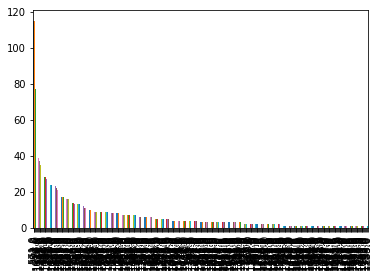

In [27]:
cancel.plot(kind='bar',rot=90)

### This shows a few areas which have abnormally large number of cancellations. These areas could be analysed closely for the reason.

In [28]:
point.online_booking.value_counts() #Counting onine booking values

0    21842
1    12450
Name: online_booking, dtype: int64

In [29]:
point.from_area_id[point.online_booking==1].value_counts() #Finding relation between online booking and area_id

393.0     1588
571.0      472
585.0      331
142.0      266
1384.0     250
293.0      210
83.0       192
1371.0     148
1096.0     140
1056.0     135
269.0      123
271.0      109
363.0      105
168.0      101
392.0      101
625.0       99
1010.0      97
1330.0      92
396.0       88
515.0       86
1390.0      85
58.0        82
105.0       79
1068.0      79
458.0       77
61.0        74
1095.0      74
450.0       73
1282.0      71
776.0       68
          ... 
1208.0       1
133.0        1
1110.0       1
807.0        1
817.0        1
1360.0       1
1100.0       1
1067.0       1
1081.0       1
1168.0       1
766.0        1
143.0        1
987.0        1
1209.0       1
1298.0       1
1291.0       1
216.0        1
68.0         1
1094.0       1
185.0        1
181.0        1
1363.0       1
369.0        1
138.0        1
1235.0       1
1249.0       1
201.0        1
1361.0       1
1218.0       1
1287.0       1
Name: from_area_id, Length: 539, dtype: int64

### Area 393.0 and 571.0 have most online bookings

In [30]:
point.from_area_id[point.mobile_site_booking==1].value_counts() #Finding relation between mobile booking and area_id

393.0     260
585.0      43
1010.0     41
571.0      37
293.0      26
1371.0     23
1384.0     21
142.0      21
1365.0     18
334.0      17
1192.0     17
83.0       17
168.0      16
363.0      14
572.0      14
87.0       13
1034.0     13
1038.0     13
1262.0     13
689.0      12
269.0      12
450.0      12
376.0      12
25.0       12
452.0      12
330.0      12
1021.0     12
271.0      12
1096.0     11
1189.0     11
         ... 
1315.0      1
1068.0      1
1246.0      1
726.0       1
1260.0      1
1109.0      1
1254.0      1
1239.0      1
1372.0      1
1379.0      1
1049.0      1
1081.0      1
987.0       1
575.0       1
217.0       1
1382.0      1
873.0       1
1318.0      1
833.0       1
1270.0      1
1366.0      1
1069.0      1
1283.0      1
1193.0      1
428.0       1
89.0        1
1150.0      1
119.0       1
420.0       1
1135.0      1
Name: from_area_id, Length: 337, dtype: int64

#### So 393.0 also has highest mobile site booking.

In [31]:
user=point.user_id
n=user.size
j=user.index

In [34]:
for i in range(0,n-1): #Loop over the total user count to find user personalied feed
    k=point.to_area_id[point.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for place he likes
    print(i,"-->",k)

0 --> 448.0    1
Name: to_area_id, dtype: int64
1 --> 540.0    1
Name: to_area_id, dtype: int64
2 --> 1034.0    1
Name: to_area_id, dtype: int64
3 --> 398.0    1
Name: to_area_id, dtype: int64
4 --> 849.0    1
Name: to_area_id, dtype: int64
5 --> 393.0    1
Name: to_area_id, dtype: int64
6 --> 832.0    1
Name: to_area_id, dtype: int64
7 --> 376.0    1
Name: to_area_id, dtype: int64
8 --> 776.0    1
Name: to_area_id, dtype: int64
9 --> 1371.0    1
Name: to_area_id, dtype: int64
10 --> 1328.0    1
Name: to_area_id, dtype: int64
11 --> 590.0    1
Name: to_area_id, dtype: int64
12 --> 1063.0    1
Name: to_area_id, dtype: int64
13 --> 292.0    10
Name: to_area_id, dtype: int64
14 --> 393.0    4
Name: to_area_id, dtype: int64
15 --> 393.0    1
Name: to_area_id, dtype: int64
16 --> 393.0    38
Name: to_area_id, dtype: int64
17 --> 1063.0    1
Name: to_area_id, dtype: int64
18 --> 590.0    1
Name: to_area_id, dtype: int64
19 --> 393.0    1
Name: to_area_id, dtype: int64
20 --> 1038.0    1
Name

211 --> 450.0    1
Name: to_area_id, dtype: int64
212 --> 667.0    1
Name: to_area_id, dtype: int64
213 --> 585.0    1
Name: to_area_id, dtype: int64
214 --> 1085.0    1
Name: to_area_id, dtype: int64
215 --> 455.0    13
Name: to_area_id, dtype: int64
216 --> 572.0    1
Name: to_area_id, dtype: int64
217 --> 393.0    1
Name: to_area_id, dtype: int64
218 --> 83.0    4
Name: to_area_id, dtype: int64
219 --> 393.0    1
Name: to_area_id, dtype: int64
220 --> 393.0    1
Name: to_area_id, dtype: int64
221 --> 1159.0    1
Name: to_area_id, dtype: int64
222 --> 1078.0    1
Name: to_area_id, dtype: int64
223 --> 455.0    1
Name: to_area_id, dtype: int64
224 --> 1217.0    7
Name: to_area_id, dtype: int64
225 --> 393.0    1
Name: to_area_id, dtype: int64
226 --> 1217.0    7
Name: to_area_id, dtype: int64
227 --> 136.0    1
Name: to_area_id, dtype: int64
228 --> 393.0    1
Name: to_area_id, dtype: int64
229 --> 176.0    1
Name: to_area_id, dtype: int64
230 --> 949.0    1
Name: to_area_id, dtype: i

403 --> 549.0    1
Name: to_area_id, dtype: int64
404 --> 393.0    3
Name: to_area_id, dtype: int64
405 --> 1096.0    2
Name: to_area_id, dtype: int64
406 --> 1017.0    2
Name: to_area_id, dtype: int64
407 --> 156.0    4
Name: to_area_id, dtype: int64
408 --> 393.0    2
Name: to_area_id, dtype: int64
409 --> 1323.0    1
Name: to_area_id, dtype: int64
410 --> 83.0    3
Name: to_area_id, dtype: int64
411 --> 393.0    38
Name: to_area_id, dtype: int64
412 --> 393.0    1
Name: to_area_id, dtype: int64
413 --> 585.0    2
Name: to_area_id, dtype: int64
414 --> 585.0    1
Name: to_area_id, dtype: int64
415 --> 292.0    3
Name: to_area_id, dtype: int64
416 --> 25.0    1
Name: to_area_id, dtype: int64
417 --> 393.0    1
Name: to_area_id, dtype: int64
418 --> 393.0    4
Name: to_area_id, dtype: int64
419 --> 393.0    4
Name: to_area_id, dtype: int64
420 --> 758.0    1
Name: to_area_id, dtype: int64
421 --> 61.0    2
Name: to_area_id, dtype: int64
422 --> 585.0    3
Name: to_area_id, dtype: int64

Name: to_area_id, dtype: int64
582 --> 334.0    1
Name: to_area_id, dtype: int64
583 --> 585.0    1
Name: to_area_id, dtype: int64
584 --> 1068.0    7
Name: to_area_id, dtype: int64
585 --> 585.0    1
Name: to_area_id, dtype: int64
586 --> 271.0    1
Name: to_area_id, dtype: int64
587 --> 393.0    3
Name: to_area_id, dtype: int64
588 --> 393.0    1
Name: to_area_id, dtype: int64
589 --> 168.0    1
Name: to_area_id, dtype: int64
590 --> 393.0    1
Name: to_area_id, dtype: int64
591 --> 1395.0    2
Name: to_area_id, dtype: int64
592 --> 393.0    1
Name: to_area_id, dtype: int64
593 --> 393.0    2
Name: to_area_id, dtype: int64
594 --> 995.0    1
Name: to_area_id, dtype: int64
595 --> 708.0    1
Name: to_area_id, dtype: int64
596 --> 708.0    1
Name: to_area_id, dtype: int64
597 --> 393.0    1
Name: to_area_id, dtype: int64
598 --> 25.0    1
Name: to_area_id, dtype: int64
599 --> 448.0    1
Name: to_area_id, dtype: int64
600 --> 393.0    3
Name: to_area_id, dtype: int64
601 --> 393.0    1

797 --> 1017.0    4
Name: to_area_id, dtype: int64
798 --> 393.0    5
Name: to_area_id, dtype: int64
799 --> 393.0    3
Name: to_area_id, dtype: int64
800 --> 683.0    1
Name: to_area_id, dtype: int64
801 --> 393.0    2
Name: to_area_id, dtype: int64
802 --> 1384.0    1
Name: to_area_id, dtype: int64
803 --> 1169.0    1
Name: to_area_id, dtype: int64
804 --> 458.0    9
Name: to_area_id, dtype: int64
805 --> 142.0    7
Name: to_area_id, dtype: int64
806 --> 393.0    3
Name: to_area_id, dtype: int64
807 --> 1133.0    5
Name: to_area_id, dtype: int64
808 --> 393.0    2
Name: to_area_id, dtype: int64
809 --> 393.0    1
Name: to_area_id, dtype: int64
810 --> 1096.0    1
Name: to_area_id, dtype: int64
811 --> 767.0    54
Name: to_area_id, dtype: int64
812 --> 149.0    1
Name: to_area_id, dtype: int64
813 --> 393.0    1
Name: to_area_id, dtype: int64
814 --> 1063.0    1
Name: to_area_id, dtype: int64
815 --> 156.0    1
Name: to_area_id, dtype: int64
816 --> 977.0    2
Name: to_area_id, dtype:

961 --> 393.0    5
Name: to_area_id, dtype: int64
962 --> 61.0    6
Name: to_area_id, dtype: int64
963 --> 58.0    2
Name: to_area_id, dtype: int64
964 --> 186.0    1
Name: to_area_id, dtype: int64
965 --> 393.0    1
Name: to_area_id, dtype: int64
966 --> 392.0    3
Name: to_area_id, dtype: int64
967 --> 393.0    1
Name: to_area_id, dtype: int64
968 --> 393.0    1
Name: to_area_id, dtype: int64
969 --> 392.0    1
Name: to_area_id, dtype: int64
970 --> 1384.0    1
Name: to_area_id, dtype: int64
971 --> 49.0    1
Name: to_area_id, dtype: int64
972 --> 362.0    1
Name: to_area_id, dtype: int64
973 --> 585.0    3
Name: to_area_id, dtype: int64
974 --> 1010.0    2
Name: to_area_id, dtype: int64
975 --> 186.0    1
Name: to_area_id, dtype: int64
976 --> 590.0    1
Name: to_area_id, dtype: int64
977 --> 484.0    1
Name: to_area_id, dtype: int64
978 --> 393.0    1
Name: to_area_id, dtype: int64
979 --> 393.0    1
Name: to_area_id, dtype: int64
980 --> 585.0    1
Name: to_area_id, dtype: int64
9

1122 --> 1371.0    1
Name: to_area_id, dtype: int64
1123 --> 222.0    1
Name: to_area_id, dtype: int64
1124 --> 393.0    2
Name: to_area_id, dtype: int64
1125 --> 393.0    2
Name: to_area_id, dtype: int64
1126 --> 1010.0    1
Name: to_area_id, dtype: int64
1127 --> 393.0    1
Name: to_area_id, dtype: int64
1128 --> 393.0    1
Name: to_area_id, dtype: int64
1129 --> 393.0    1
Name: to_area_id, dtype: int64
1130 --> 393.0    2
Name: to_area_id, dtype: int64
1131 --> 1068.0    14
Name: to_area_id, dtype: int64
1132 --> 344.0    2
Name: to_area_id, dtype: int64
1133 --> 293.0    1
Name: to_area_id, dtype: int64
1134 --> 1095.0    3
Name: to_area_id, dtype: int64
1135 --> 585.0    1
Name: to_area_id, dtype: int64
1136 --> 393.0    1
Name: to_area_id, dtype: int64
1137 --> 1330.0    5
Name: to_area_id, dtype: int64
1138 --> 393.0    2
Name: to_area_id, dtype: int64
1139 --> 450.0    2
Name: to_area_id, dtype: int64
1140 --> 585.0    1
Name: to_area_id, dtype: int64
1141 --> 1102.0    3
Name

1299 --> 1384.0    1
Name: to_area_id, dtype: int64
1300 --> 393.0    1
Name: to_area_id, dtype: int64
1301 --> 571.0    1
Name: to_area_id, dtype: int64
1302 --> 393.0    1
Name: to_area_id, dtype: int64
1303 --> 419.0    1
Name: to_area_id, dtype: int64
1304 --> 393.0    3
Name: to_area_id, dtype: int64
1305 --> 471.0    1
Name: to_area_id, dtype: int64
1306 --> 393.0    2
Name: to_area_id, dtype: int64
1307 --> 393.0    2
Name: to_area_id, dtype: int64
1308 --> 393.0    2
Name: to_area_id, dtype: int64
1309 --> 1061.0    1
Name: to_area_id, dtype: int64
1310 --> 585.0    1
Name: to_area_id, dtype: int64
1311 --> 149.0    8
Name: to_area_id, dtype: int64
1312 --> 393.0    1
Name: to_area_id, dtype: int64
1313 --> 293.0    5
Name: to_area_id, dtype: int64
1314 --> 1038.0    1
Name: to_area_id, dtype: int64
1315 --> 393.0    1
Name: to_area_id, dtype: int64
1316 --> 156.0    4
Name: to_area_id, dtype: int64
1317 --> 1063.0    3
Name: to_area_id, dtype: int64
1318 --> 677.0    1
Name: t

1481 --> 471.0    1
Name: to_area_id, dtype: int64
1482 --> 1096.0    6
Name: to_area_id, dtype: int64
1483 --> 1096.0    6
Name: to_area_id, dtype: int64
1484 --> 571.0    5
Name: to_area_id, dtype: int64
1485 --> 1096.0    6
Name: to_area_id, dtype: int64
1486 --> 1096.0    6
Name: to_area_id, dtype: int64
1487 --> 1096.0    6
Name: to_area_id, dtype: int64
1488 --> 492.0    5
Name: to_area_id, dtype: int64
1489 --> 1096.0    6
Name: to_area_id, dtype: int64
1490 --> 1096.0    6
Name: to_area_id, dtype: int64
1491 --> 1096.0    6
Name: to_area_id, dtype: int64
1492 --> 393.0    1
Name: to_area_id, dtype: int64
1493 --> 112.0    1
Name: to_area_id, dtype: int64
1494 --> 393.0    3
Name: to_area_id, dtype: int64
1495 --> 1393.0    1
Name: to_area_id, dtype: int64
1496 --> 217.0    1
Name: to_area_id, dtype: int64
1497 --> 182.0    10
Name: to_area_id, dtype: int64
1498 --> 689.0    1
Name: to_area_id, dtype: int64
1499 --> 393.0    1
Name: to_area_id, dtype: int64
1500 --> 1333.0    1


1658 --> 1384.0    1
Name: to_area_id, dtype: int64
1659 --> 1253.0    1
Name: to_area_id, dtype: int64
1660 --> 1328.0    5
Name: to_area_id, dtype: int64
1661 --> 1053.0    1
Name: to_area_id, dtype: int64
1662 --> 1384.0    2
Name: to_area_id, dtype: int64
1663 --> 1384.0    2
Name: to_area_id, dtype: int64
1664 --> 571.0    1
Name: to_area_id, dtype: int64
1665 --> 1384.0    1
Name: to_area_id, dtype: int64
1666 --> 137.0    5
Name: to_area_id, dtype: int64
1667 --> 502.0    1
Name: to_area_id, dtype: int64
1668 --> 393.0    5
Name: to_area_id, dtype: int64
1669 --> 1304.0    2
Name: to_area_id, dtype: int64
1670 --> 1304.0    2
Name: to_area_id, dtype: int64
1671 --> 393.0    3
Name: to_area_id, dtype: int64
1672 --> 788.0    4
Name: to_area_id, dtype: int64
1673 --> 1096.0    1
Name: to_area_id, dtype: int64
1674 --> 168.0    1
Name: to_area_id, dtype: int64
1675 --> 393.0    2
Name: to_area_id, dtype: int64
1676 --> 393.0    1
Name: to_area_id, dtype: int64
1677 --> 1166.0    1


1825 --> 571.0    1
Name: to_area_id, dtype: int64
1826 --> 393.0    5
Name: to_area_id, dtype: int64
1827 --> 625.0    3
Name: to_area_id, dtype: int64
1828 --> 585.0    3
Name: to_area_id, dtype: int64
1829 --> 339.0    1
Name: to_area_id, dtype: int64
1830 --> 1379.0    3
Name: to_area_id, dtype: int64
1831 --> 393.0    1
Name: to_area_id, dtype: int64
1832 --> 1150.0    3
Name: to_area_id, dtype: int64
1833 --> 1078.0    1
Name: to_area_id, dtype: int64
1834 --> 1192.0    1
Name: to_area_id, dtype: int64
1835 --> 585.0    1
Name: to_area_id, dtype: int64
1836 --> 1389.0    1
Name: to_area_id, dtype: int64
1837 --> 571.0    1
Name: to_area_id, dtype: int64
1838 --> 1389.0    1
Name: to_area_id, dtype: int64
1839 --> 768.0    1
Name: to_area_id, dtype: int64
1840 --> 1078.0    1
Name: to_area_id, dtype: int64
1841 --> 1384.0    2
Name: to_area_id, dtype: int64
1842 --> 516.0    2
Name: to_area_id, dtype: int64
1843 --> 1371.0    1
Name: to_area_id, dtype: int64
1844 --> 115.0    1
Na

KeyboardInterrupt: 

### The above can be used as a basic recommendation for a user based on his most frequent place he chooses as 'Destination' while booking

In [35]:
for i in range(0,n-1):
    k=point.vehicle_model_id[point.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for vehicle he books
    print(i,"-->",k)

0 --> 28    1
Name: vehicle_model_id, dtype: int64
1 --> 12    1
Name: vehicle_model_id, dtype: int64
2 --> 12    1
Name: vehicle_model_id, dtype: int64
3 --> 12    1
Name: vehicle_model_id, dtype: int64
4 --> 12    1
Name: vehicle_model_id, dtype: int64
5 --> 12    2
Name: vehicle_model_id, dtype: int64
6 --> 12    1
Name: vehicle_model_id, dtype: int64
7 --> 12    1
Name: vehicle_model_id, dtype: int64
8 --> 12    1
Name: vehicle_model_id, dtype: int64
9 --> 86    1
Name: vehicle_model_id, dtype: int64
10 --> 12    1
Name: vehicle_model_id, dtype: int64
11 --> 12    1
Name: vehicle_model_id, dtype: int64
12 --> 28    2
Name: vehicle_model_id, dtype: int64
13 --> 12    10
Name: vehicle_model_id, dtype: int64
14 --> 12    4
Name: vehicle_model_id, dtype: int64
15 --> 12    3
Name: vehicle_model_id, dtype: int64
16 --> 12    156
Name: vehicle_model_id, dtype: int64
17 --> 28    2
Name: vehicle_model_id, dtype: int64
18 --> 12    2
Name: vehicle_model_id, dtype: int64
19 --> 12    1
Name

158 --> 12    1
Name: vehicle_model_id, dtype: int64
159 --> 28    1
Name: vehicle_model_id, dtype: int64
160 --> 12    5
Name: vehicle_model_id, dtype: int64
161 --> 12    1
Name: vehicle_model_id, dtype: int64
162 --> 12    2
Name: vehicle_model_id, dtype: int64
163 --> 12    17
Name: vehicle_model_id, dtype: int64
164 --> 12    2
Name: vehicle_model_id, dtype: int64
165 --> 85    1
Name: vehicle_model_id, dtype: int64
166 --> 12    22
Name: vehicle_model_id, dtype: int64
167 --> 12    3
Name: vehicle_model_id, dtype: int64
168 --> 12    1
Name: vehicle_model_id, dtype: int64
169 --> 12    1
Name: vehicle_model_id, dtype: int64
170 --> 12    4
Name: vehicle_model_id, dtype: int64
171 --> 12    1
Name: vehicle_model_id, dtype: int64
172 --> 12    3
Name: vehicle_model_id, dtype: int64
173 --> 12    2
Name: vehicle_model_id, dtype: int64
174 --> 12    2
Name: vehicle_model_id, dtype: int64
175 --> 12    31
Name: vehicle_model_id, dtype: int64
176 --> 12    3
Name: vehicle_model_id, dty

317 --> 12    1
Name: vehicle_model_id, dtype: int64
318 --> 65    2
Name: vehicle_model_id, dtype: int64
319 --> 65    2
Name: vehicle_model_id, dtype: int64
320 --> 12    1
Name: vehicle_model_id, dtype: int64
321 --> 12    1
Name: vehicle_model_id, dtype: int64
322 --> 12    1
Name: vehicle_model_id, dtype: int64
323 --> 12    3
Name: vehicle_model_id, dtype: int64
324 --> 12    1
Name: vehicle_model_id, dtype: int64
325 --> 12    3
Name: vehicle_model_id, dtype: int64
326 --> 12    1
Name: vehicle_model_id, dtype: int64
327 --> 65    1
Name: vehicle_model_id, dtype: int64
328 --> 85    1
Name: vehicle_model_id, dtype: int64
329 --> 12    1
Name: vehicle_model_id, dtype: int64
330 --> 12    1
Name: vehicle_model_id, dtype: int64
331 --> 12    4
Name: vehicle_model_id, dtype: int64
332 --> 12    1
Name: vehicle_model_id, dtype: int64
333 --> 12    6
Name: vehicle_model_id, dtype: int64
334 --> 12    5
Name: vehicle_model_id, dtype: int64
335 --> 12    4
Name: vehicle_model_id, dtype:

473 --> 12    2
Name: vehicle_model_id, dtype: int64
474 --> 12    156
Name: vehicle_model_id, dtype: int64
475 --> 12    156
Name: vehicle_model_id, dtype: int64
476 --> 12    10
Name: vehicle_model_id, dtype: int64
477 --> 12    2
Name: vehicle_model_id, dtype: int64
478 --> 12    2
Name: vehicle_model_id, dtype: int64
479 --> 87    2
Name: vehicle_model_id, dtype: int64
480 --> 87    2
Name: vehicle_model_id, dtype: int64
481 --> 12    1
Name: vehicle_model_id, dtype: int64
482 --> 12    1
Name: vehicle_model_id, dtype: int64
483 --> 12    5
Name: vehicle_model_id, dtype: int64
484 --> 12    2
Name: vehicle_model_id, dtype: int64
485 --> 12    10
Name: vehicle_model_id, dtype: int64
486 --> 12    2
Name: vehicle_model_id, dtype: int64
487 --> 12    1
Name: vehicle_model_id, dtype: int64
488 --> 12    1
Name: vehicle_model_id, dtype: int64
489 --> 12    1
Name: vehicle_model_id, dtype: int64
490 --> 12    1
Name: vehicle_model_id, dtype: int64
491 --> 12    8
Name: vehicle_model_id, 

640 --> 12    2
Name: vehicle_model_id, dtype: int64
641 --> 12    1
Name: vehicle_model_id, dtype: int64
642 --> 12    1
Name: vehicle_model_id, dtype: int64
643 --> 12    2
Name: vehicle_model_id, dtype: int64
644 --> 12    3
Name: vehicle_model_id, dtype: int64
645 --> 12    1
Name: vehicle_model_id, dtype: int64
646 --> 12    7
Name: vehicle_model_id, dtype: int64
647 --> 12    5
Name: vehicle_model_id, dtype: int64
648 --> 12    1
Name: vehicle_model_id, dtype: int64
649 --> 12    1
Name: vehicle_model_id, dtype: int64
650 --> 12    1
Name: vehicle_model_id, dtype: int64
651 --> 12    1
Name: vehicle_model_id, dtype: int64
652 --> 12    1
Name: vehicle_model_id, dtype: int64
653 --> 12    60
Name: vehicle_model_id, dtype: int64
654 --> 12    1
Name: vehicle_model_id, dtype: int64
655 --> 12    5
Name: vehicle_model_id, dtype: int64
656 --> 12    5
Name: vehicle_model_id, dtype: int64
657 --> 12    3
Name: vehicle_model_id, dtype: int64
658 --> 12    7
Name: vehicle_model_id, dtype

KeyboardInterrupt: 

### Similar to the previous one, we get a preference of the model_id of the car he likes to choose the most

In [36]:
# Find which vehicle used more frequently in an area


In [37]:
for i in range(0,586): 
    a=point.vehicle_model_id[point.from_area_id==p[i]].value_counts() #Looking into relation between area_id and vehicle most frequently used for that area
    print(p[i],"-->",a)

393.0 --> 12    2140
85     297
89     274
24     208
28     164
65     147
90      50
23      40
87      16
86      16
10       9
64       6
91       5
17       3
Name: vehicle_model_id, dtype: int64
571.0 --> 12    906
85     62
89     58
28     53
65     38
24     34
90     11
64     10
23      8
87      7
86      5
10      5
17      1
Name: vehicle_model_id, dtype: int64
585.0 --> 12    576
85     48
28     47
89     41
65     31
24     26
23      8
87      7
90      6
10      4
91      1
86      1
64      1
17      1
Name: vehicle_model_id, dtype: int64
293.0 --> 12    640
89     32
85     24
24     19
28     14
65      9
90      7
17      6
87      5
23      3
10      1
Name: vehicle_model_id, dtype: int64
1384.0 --> 12    412
89     41
65     36
28     34
85     30
24     22
23      8
10      5
90      4
87      4
86      2
64      1
Name: vehicle_model_id, dtype: int64
142.0 --> 12    419
85     40
89     38
24     25
28     19
65     11
23      7
90      6
86      4
87      2


849.0 --> 12    59
85     7
28     4
89     2
86     1
65     1
64     1
24     1
23     1
Name: vehicle_model_id, dtype: int64
87.0 --> 12    58
85     8
89     4
28     3
90     2
24     2
Name: vehicle_model_id, dtype: int64
452.0 --> 12    55
89     6
85     6
28     4
65     3
24     2
Name: vehicle_model_id, dtype: int64
1181.0 --> 12    57
85     8
28     4
24     3
90     1
89     1
65     1
10     1
Name: vehicle_model_id, dtype: int64
376.0 --> 12    59
65     5
89     4
85     3
90     1
24     1
23     1
10     1
Name: vehicle_model_id, dtype: int64
1391.0 --> 12    58
85     5
89     4
65     3
24     3
90     1
Name: vehicle_model_id, dtype: int64
540.0 --> 12    55
89     5
65     4
85     3
28     3
24     2
23     1
Name: vehicle_model_id, dtype: int64
1280.0 --> 12    52
89     7
24     5
85     4
86     2
28     2
Name: vehicle_model_id, dtype: int64
1175.0 --> 12    31
65    21
89     6
28     5
24     4
85     3
87     1
Name: vehicle_model_id, dtype: int64
1061.0 

1045.0 --> 12    18
28     4
65     2
89     1
24     1
23     1
85     1
Name: vehicle_model_id, dtype: int64
1198.0 --> 12    21
89     2
85     2
24     1
65     1
Name: vehicle_model_id, dtype: int64
1376.0 --> 12    23
89     1
24     1
65     1
64     1
Name: vehicle_model_id, dtype: int64
51.0 --> 12    20
28     3
24     2
89     1
85     1
Name: vehicle_model_id, dtype: int64
1217.0 --> 12    24
28     2
85     1
Name: vehicle_model_id, dtype: int64
1226.0 --> 12    23
24     2
28     1
85     1
Name: vehicle_model_id, dtype: int64
409.0 --> 12    16
65     4
89     2
24     2
85     2
28     1
Name: vehicle_model_id, dtype: int64
1058.0 --> 12    19
85     3
90     2
28     1
10     1
65     1
Name: vehicle_model_id, dtype: int64
968.0 --> 12    21
28     2
89     1
24     1
65     1
Name: vehicle_model_id, dtype: int64
1071.0 --> 12    18
89     4
90     2
28     1
23     1
Name: vehicle_model_id, dtype: int64
1194.0 --> 12    21
85     2
28     1
90     1
24     1
Name: veh

1303.0 --> 85    3
12    2
89    2
24    2
28    1
65    1
Name: vehicle_model_id, dtype: int64
1294.0 --> 12    7
85    3
24    1
Name: vehicle_model_id, dtype: int64
1370.0 --> 12    9
85    2
Name: vehicle_model_id, dtype: int64
1250.0 --> 12    8
28    1
89    1
24    1
Name: vehicle_model_id, dtype: int64
1311.0 --> 12    8
28    2
89    1
Name: vehicle_model_id, dtype: int64
1075.0 --> 12    8
24    1
23    1
85    1
Name: vehicle_model_id, dtype: int64
1245.0 --> 12    5
85    3
24    2
Name: vehicle_model_id, dtype: int64
1259.0 --> 12    8
85    2
Name: vehicle_model_id, dtype: int64
418.0 --> 12    9
24    1
Name: vehicle_model_id, dtype: int64
758.0 --> 12    7
89    1
85    1
65    1
Name: vehicle_model_id, dtype: int64
1225.0 --> 12    7
28    1
89    1
24    1
Name: vehicle_model_id, dtype: int64
995.0 --> 12    8
28    1
85    1
Name: vehicle_model_id, dtype: int64
1342.0 --> 12    9
17    1
Name: vehicle_model_id, dtype: int64
1276.0 --> 12    10
Name: vehicle_model_id,

1113.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1277.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1343.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1092.0 --> 85    1
Name: vehicle_model_id, dtype: int64
733.0 --> 12    1
Name: vehicle_model_id, dtype: int64
549.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1042.0 --> 85    1
Name: vehicle_model_id, dtype: int64
1158.0 --> 12    1
Name: vehicle_model_id, dtype: int64
921.0 --> 65    1
Name: vehicle_model_id, dtype: int64
1143.0 --> 28    1
Name: vehicle_model_id, dtype: int64
72.0 --> 28    1
Name: vehicle_model_id, dtype: int64
1352.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1178.0 --> 12    1
Name: vehicle_model_id, dtype: int64
901.0 --> 12    1
Name: vehicle_model_id, dtype: int64
133.0 --> 12    1
Name: vehicle_model_id, dtype: int64
1117.0 --> 12    1
Name: vehicle_model_id, dtype: int64
185.0 --> 12    1
Name: vehicle_model_id, dtype: int64
79.0 --> 12    1
Name: vehicle_model_id, dtype: int64
13

### We see that most areas require model id 12 vehicles more. All other model ids  and their counts are mentioned. Hence this suggests that these areas should have vehicles of these mode_ids more

# --------------------

# POINT-To-POINT recaps:

##### >> Company can make use the finding of peak hours and batch of timings. The prices can be made high in peak hours and lower in others.
##### >> Company can also look up to the table which shows which area has most bookings and the timings of each area when most rush is there. So company can increase price in this area at this particular time.
##### >> Also, we have a table which shows in general at what time how much bookings are made. Time at which more bookings are made, company can have more vehicles in use and price more due to more demands
##### >> We have also  identified areas with most online and website bookings
##### >> Now, the app can provide each user with suggestions for the places he generally uses as destinationand also for the type of vehicle he uses. This shall facilitate the user and improve the performance for the app
##### >> The company can see what model of vehicle is more needed in an area and in general as well. 

### These points can drastically help the company gain and build customers and optimize its working. 

# -------------------------------------------------------------------------------------------------------------

# Long-Distance Package Analysis

In [38]:
long

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,1/1/2013 9:45,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,1/12/2013 8:00,1/14/2013 0:00,1,0,1/1/2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,1/5/2013 8:30,1/5/2013 0:00,0,0,1/1/2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,1/4/2013 9:30,1/4/2013 9:30,1,0,1/3/2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,1/6/2013 7:30,1/6/2013 0:00,1,0,1/4/2013 9:32,12.930220,77.560390,NaN,NaN,0
233,132780,22318,65,NaN,1,293.0,NaN,15.0,32.0,1/5/2013 8:00,1/6/2013 0:00,0,0,1/4/2013 12:43,12.849482,77.663187,NaN,NaN,0
234,132781,22319,87,NaN,1,912.0,NaN,1.0,32.0,1/5/2013 6:00,1/5/2013 6:00,1,0,1/4/2013 12:51,12.926450,77.612060,NaN,NaN,0
243,132791,22323,65,NaN,1,410.0,NaN,15.0,29.0,1/9/2013 6:00,1/12/2013 0:00,0,0,1/4/2013 14:40,13.051210,77.541130,NaN,NaN,0
328,132907,22385,12,NaN,1,393.0,NaN,15.0,32.0,1/5/2013 22:45,1/5/2013 0:00,0,0,1/5/2013 15:29,13.199560,77.706880,NaN,NaN,0
332,132911,22387,12,NaN,1,396.0,NaN,15.0,32.0,1/6/2013 6:45,1/6/2013 0:00,0,0,1/5/2013 16:24,12.920730,77.664820,NaN,NaN,0


In [39]:
long.shape

(1589, 19)

In [40]:
long.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
to_date                  85
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

#### Package id, to_area_id, to_lat, to_long are all empty so can't use these

In [41]:
long=long.drop(['package_id','to_area_id','to_lat','to_long'],axis=1)

In [42]:
# Since we have the from city id and area id and also latitude and longitude for the same but we don't have to_city or to_latitude and longitude id, so from_long and from_lat is of no use
long=long.drop(['from_lat','from_long'],axis=1)

In [48]:
#Taking only those rows with no nan values
long=long[long.from_city_id.notnull()]
long=long[long.from_area_id.notnull()]
long=long[long.to_date.notnull()]

In [49]:
long.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
dtype: int64

In [50]:
#Convert date and time to standard format
long.from_date = pd.to_datetime(long.from_date)
long.booking_created = pd.to_datetime(long.booking_created)
long.to_date = pd.to_datetime(long.to_date)

In [51]:
long['time_travel'] = long['to_date'] - long['from_date'] #Difference between booking time and the time when trip start
long['time_travel']=long['time_travel']/np.timedelta64(1,'m')
long

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,time_travel
6,132519,22172,12,1,571.0,15.0,108.0,2013-01-01 09:45:00,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.0
24,132539,22192,54,1,515.0,15.0,32.0,2013-01-05 08:30:00,2013-01-05 00:00:00,0,0,2013-01-01 14:40:00,0,-510.0
158,132697,22275,28,1,136.0,1.0,152.0,2013-01-04 09:30:00,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.0
233,132780,22318,65,1,293.0,15.0,32.0,2013-01-05 08:00:00,2013-01-06 00:00:00,0,0,2013-01-04 12:43:00,0,960.0
234,132781,22319,87,1,912.0,1.0,32.0,2013-01-05 06:00:00,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0.0
243,132791,22323,65,1,410.0,15.0,29.0,2013-01-09 06:00:00,2013-01-12 00:00:00,0,0,2013-01-04 14:40:00,0,3960.0
328,132907,22385,12,1,393.0,15.0,32.0,2013-01-05 22:45:00,2013-01-05 00:00:00,0,0,2013-01-05 15:29:00,0,-1365.0
332,132911,22387,12,1,396.0,15.0,32.0,2013-01-06 06:45:00,2013-01-06 00:00:00,0,0,2013-01-05 16:24:00,0,-405.0
374,132964,22412,12,1,344.0,15.0,160.0,2013-01-06 08:00:00,2013-01-06 08:00:00,0,0,2013-01-05 23:51:00,0,0.0
422,133022,22445,54,1,1095.0,1.0,32.0,2013-01-19 07:00:00,2013-01-19 07:00:00,1,0,2013-01-06 14:57:00,0,0.0


In [52]:
a=long.time_travel.value_counts()
a #Time of travel in minutes and their counts

 0.0           158
 1440.0         73
 1079.0         73
-360.0          56
 2880.0         45
 1019.0         32
 959.0          26
-480.0          24
-420.0          23
 4320.0         21
 2519.0         18
 3959.0         15
 1080.0         14
-390.0          14
 1049.0         14
-450.0          13
-540.0          12
-570.0          11
 2520.0         11
 1139.0          9
 989.0           9
-510.0           9
 2459.0          9
 3899.0          9
-240.0           9
 899.0           8
 5760.0          8
 779.0           7
 839.0           7
 1140.0          6
              ... 
-1170.0          1
-22704480.0      1
 5219.0          1
 3930.0          1
 6600.0          1
-22782240.0      1
 630.0           1
 11040.0         1
 1919.0          1
 3780.0          1
 4439.0          1
 2415.0          1
 3510.0          1
 2639.0          1
-22844160.0      1
-915.0           1
 5369.0          1
-22641120.0      1
 3075.0          1
 2144.0          1
-330.0           1
 824.0      

In [53]:
long.drop(long[long['time_travel'] == 0.0].index, inplace = True) #Time of travel 0 minutes mean no sense

In [54]:
r=long.time_travel[long.time_travel<0]
r=r*(-1)
long.time_travel[long.time_travel<0]=r # #All negative values changed to positive because that may be an error

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
long.drop(long[long['time_travel'] > 5000].index, inplace = True) # There are values of time of travel from 1970 to 2013. Obviously we don't want those

In [56]:
long.time_travel.mean() # Mean to travel time in minutes

1512.5173783515393

#### Mean travel time of each booking in this long package in minutes is 1500 mins. So all drivers should have an estimate of the fuel and resources for this much hours.

In [57]:
# To which city most bookings?
long.to_city_id.value_counts()

32.0     294
55.0     109
29.0      76
146.0     61
108.0     50
58.0      18
131.0     18
13.0      17
49.0      16
24.0      15
44.0      15
147.0     15
64.0      14
41.0      13
113.0     13
152.0     12
161.0     12
4.0       10
160.0     10
56.0      10
191.0      9
37.0       9
51.0       8
45.0       8
31.0       8
125.0      7
110.0      7
65.0       6
61.0       6
116.0      5
        ... 
5.0        2
190.0      2
142.0      1
179.0      1
25.0       1
154.0      1
186.0      1
137.0      1
189.0      1
157.0      1
169.0      1
139.0      1
133.0      1
165.0      1
68.0       1
23.0       1
176.0      1
28.0       1
52.0       1
111.0      1
200.0      1
94.0       1
132.0      1
120.0      1
88.0       1
57.0       1
18.0       1
196.0      1
170.0      1
149.0      1
Name: to_city_id, Length: 91, dtype: int64

#### Most bookings are made to city 32.0 and 55.0

In [58]:
# Which vehicle model is used frequently for more travel
long.vehicle_model_id.value_counts()

12    459
65    246
87    113
89     66
85     36
24     30
54     29
28     19
10      3
90      2
23      2
86      1
69      1
Name: vehicle_model_id, dtype: int64

### For long distance, vehicles with id 12,65,87 are most popular

20    84
15    76
19    74
16    74
12    70
18    68
17    60
13    60
14    59
11    53
10    52
22    52
21    45
23    44
9     35
0     28
8     27
7     16
2     10
1     10
6      4
4      3
5      2
3      1
Name: booking_created, dtype: int64


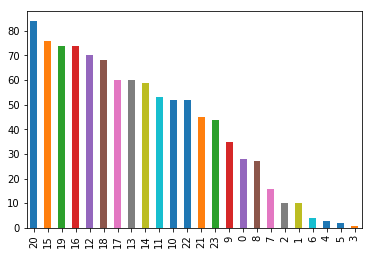

In [59]:
# For long journey, what batch timings most bookings made?
a=long.booking_created.dt.hour.value_counts() # Number of bookings made by time in hour
print(a)
a.plot(kind='bar')

### This shows the time for most bookings for Long distance journey. We see that most bookings are made in noon and evening period

In [60]:
long[(long.online_booking==1) | (long.mobile_site_booking==1)].count() #Finding total sum of online and mobile booking

id                     323
user_id                323
vehicle_model_id       323
travel_type_id         323
from_area_id           323
from_city_id           323
to_city_id             323
from_date              323
to_date                323
online_booking         323
mobile_site_booking    323
booking_created        323
Car_Cancellation       323
time_travel            323
dtype: int64

In [61]:
long.shape

(1007, 14)

### This shows that 1004-323= 681 bookings are made via telephone

In [63]:
user=long.user_id
n=user.size
j=user.index

for i in range(0,n-1):
    k=long.to_city_id[long.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for place he likes
    print(i,"-->",k)

0 --> 32.0    1
Name: to_city_id, dtype: int64
1 --> 32.0    1
Name: to_city_id, dtype: int64
2 --> 29.0    1
Name: to_city_id, dtype: int64
3 --> 32.0    1
Name: to_city_id, dtype: int64
4 --> 32.0    1
Name: to_city_id, dtype: int64
5 --> 29.0    1
Name: to_city_id, dtype: int64
6 --> 64.0    1
Name: to_city_id, dtype: int64
7 --> 146.0    1
Name: to_city_id, dtype: int64
8 --> 179.0    1
Name: to_city_id, dtype: int64
9 --> 131.0    1
Name: to_city_id, dtype: int64
10 --> 146.0    1
Name: to_city_id, dtype: int64
11 --> 29.0    1
Name: to_city_id, dtype: int64
12 --> 29.0    1
Name: to_city_id, dtype: int64
13 --> 148.0    1
Name: to_city_id, dtype: int64
14 --> 32.0    1
Name: to_city_id, dtype: int64
15 --> 32.0    1
Name: to_city_id, dtype: int64
16 --> 55.0    1
Name: to_city_id, dtype: int64
17 --> 32.0    1
Name: to_city_id, dtype: int64
18 --> 32.0    1
Name: to_city_id, dtype: int64
19 --> 32.0    1
Name: to_city_id, dtype: int64
20 --> 32.0    1
Name: to_city_id, dtype: int

219 --> 108.0    1
Name: to_city_id, dtype: int64
220 --> 32.0    1
Name: to_city_id, dtype: int64
221 --> 62.0    1
Name: to_city_id, dtype: int64
222 --> 55.0    1
Name: to_city_id, dtype: int64
223 --> 32.0    2
Name: to_city_id, dtype: int64
224 --> 55.0    1
Name: to_city_id, dtype: int64
225 --> 146.0    2
Name: to_city_id, dtype: int64
226 --> 161.0    1
Name: to_city_id, dtype: int64
227 --> 146.0    2
Name: to_city_id, dtype: int64
228 --> 13.0    1
Name: to_city_id, dtype: int64
229 --> 191.0    1
Name: to_city_id, dtype: int64
230 --> 110.0    1
Name: to_city_id, dtype: int64
231 --> 55.0    1
Name: to_city_id, dtype: int64
232 --> 32.0    1
Name: to_city_id, dtype: int64
233 --> 44.0    1
Name: to_city_id, dtype: int64
234 --> 32.0    1
Name: to_city_id, dtype: int64
235 --> 75.0    1
Name: to_city_id, dtype: int64
236 --> 55.0    1
Name: to_city_id, dtype: int64
237 --> 131.0    1
Name: to_city_id, dtype: int64
238 --> 32.0    1
Name: to_city_id, dtype: int64
239 --> 89.0 

427 --> 113.0    1
Name: to_city_id, dtype: int64
428 --> 32.0    2
Name: to_city_id, dtype: int64
429 --> 32.0    2
Name: to_city_id, dtype: int64
430 --> 32.0    1
Name: to_city_id, dtype: int64
431 --> 32.0    1
Name: to_city_id, dtype: int64
432 --> 55.0    1
Name: to_city_id, dtype: int64
433 --> 146.0    1
Name: to_city_id, dtype: int64
434 --> 61.0    1
Name: to_city_id, dtype: int64
435 --> 32.0    2
Name: to_city_id, dtype: int64
436 --> 165.0    1
Name: to_city_id, dtype: int64
437 --> 37.0    1
Name: to_city_id, dtype: int64
438 --> 4.0    1
Name: to_city_id, dtype: int64
439 --> 55.0    1
Name: to_city_id, dtype: int64
440 --> 4.0    1
Name: to_city_id, dtype: int64
441 --> 131.0    1
Name: to_city_id, dtype: int64
442 --> 5.0    1
Name: to_city_id, dtype: int64
443 --> 13.0    1
Name: to_city_id, dtype: int64
444 --> 55.0    1
Name: to_city_id, dtype: int64
445 --> 32.0    1
Name: to_city_id, dtype: int64
446 --> 146.0    1
Name: to_city_id, dtype: int64
447 --> 75.0    1


618 --> 55.0    1
Name: to_city_id, dtype: int64
619 --> 168.0    1
Name: to_city_id, dtype: int64
620 --> 55.0    1
Name: to_city_id, dtype: int64
621 --> 13.0    1
Name: to_city_id, dtype: int64
622 --> 121.0    1
Name: to_city_id, dtype: int64
623 --> 13.0    1
Name: to_city_id, dtype: int64
624 --> 29.0    1
Name: to_city_id, dtype: int64
625 --> 32.0    1
Name: to_city_id, dtype: int64
626 --> 29.0    1
Name: to_city_id, dtype: int64
627 --> 125.0    1
Name: to_city_id, dtype: int64
628 --> 146.0    1
Name: to_city_id, dtype: int64
629 --> 191.0    1
Name: to_city_id, dtype: int64
630 --> 116.0    1
Name: to_city_id, dtype: int64
631 --> 108.0    1
Name: to_city_id, dtype: int64
632 --> 56.0    1
Name: to_city_id, dtype: int64
633 --> 32.0    1
Name: to_city_id, dtype: int64
634 --> 110.0    1
Name: to_city_id, dtype: int64
635 --> 113.0    1
Name: to_city_id, dtype: int64
636 --> 55.0    1
Name: to_city_id, dtype: int64
637 --> 37.0    1
Name: to_city_id, dtype: int64
638 --> 29.

812 --> 36.0    1
Name: to_city_id, dtype: int64
813 --> 32.0    1
Name: to_city_id, dtype: int64
814 --> 111.0    1
Name: to_city_id, dtype: int64
815 --> 55.0    1
Name: to_city_id, dtype: int64
816 --> 55.0    1
Name: to_city_id, dtype: int64
817 --> 29.0    1
Name: to_city_id, dtype: int64
818 --> 45.0    1
Name: to_city_id, dtype: int64
819 --> 45.0    1
Name: to_city_id, dtype: int64
820 --> 52.0    1
Name: to_city_id, dtype: int64
821 --> 36.0    1
Name: to_city_id, dtype: int64
822 --> 32.0    1
Name: to_city_id, dtype: int64
823 --> 173.0    1
Name: to_city_id, dtype: int64
824 --> 29.0    1
Name: to_city_id, dtype: int64
825 --> 32.0    1
Name: to_city_id, dtype: int64
826 --> 32.0    2
Name: to_city_id, dtype: int64
827 --> 32.0    2
Name: to_city_id, dtype: int64
828 --> 32.0    1
Name: to_city_id, dtype: int64
829 --> 32.0    1
Name: to_city_id, dtype: int64
830 --> 55.0    1
Name: to_city_id, dtype: int64
831 --> 13.0    1
Name: to_city_id, dtype: int64
832 --> 116.0    1

### This can act as a recommendation system for the company where they can suggest in their app of the destination city based on his frequency and past searches

## ---------------

## LONG Distance Package Recap:

##### >> We found the average travel time of each trip so the company can allocate resources  accordingly.
##### >> Company can find the place (city) to which most bookings are made.
##### >> Also, we can find the vehicles which people use most for the long distance package so more vehicles of these ids can be allotted to this package.
##### >> Company can identify from the bar graph at what time most bookings of long distance are made and accordingly recources could be made readay for maximum benefit.
##### >> We have also found an interesting fact that most bookings of long distance package are made via telephone.

### These points can drastically help the company gain and build customers and optimize its working. 

# ----------------------------------------------------------------------------------------------

# HOURLY package Analysis

In [65]:
hour

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,0,0,1/1/2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,1/1/2013 16:30,NaN,0,0,1/1/2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,1/1/2013 20:00,1/1/2013 0:00,1,0,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,1/2/2013 3:00,NaN,0,0,1/1/2013 19:37,12.912810,77.609230,NaN,NaN,0
71,132598,21995,28,2.0,3,87.0,NaN,NaN,NaN,1/2/2013 12:00,NaN,0,0,1/2/2013 8:35,12.970030,77.606580,NaN,NaN,0
74,132602,15529,12,2.0,3,217.0,NaN,NaN,NaN,1/2/2013 14:30,NaN,0,0,1/2/2013 9:04,13.001100,77.623500,NaN,NaN,0
76,132605,15846,17,1.0,3,142.0,NaN,NaN,NaN,1/2/2013 10:30,NaN,0,0,1/2/2013 9:18,12.912810,77.609230,NaN,NaN,0
79,132608,22228,12,2.0,3,590.0,NaN,NaN,NaN,1/2/2013 11:00,NaN,0,0,1/2/2013 10:08,13.008260,77.564330,NaN,NaN,0
80,132609,2005,24,1.0,3,1086.0,NaN,NaN,NaN,1/2/2013 12:15,1/2/2013 0:00,1,0,1/2/2013 10:14,12.907487,77.647290,NaN,NaN,0


In [67]:
hour.shape

(7550, 19)

In [66]:
hour.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
to_date                2620
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

In [72]:
# We see that there are some columns which most of the data missing: to_area_id, from_city_id, to_city_id, to_lat, to_long so we have no option than to drop these.
hour=hour.drop(['to_area_id', 'from_city_id', 'to_city_id', 'to_lat', 'to_long'],axis=1)

In [73]:
# We can not fill the nan values in to_date for the 2000 columns, so we drop these rows with nan value
hour=hour[hour.to_date.notnull()]

In [74]:
hour.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

In [83]:
#Convert date and time to standard format
hour.from_date = pd.to_datetime(hour.from_date)
hour.booking_created = pd.to_datetime(hour.booking_created)
hour.to_date = pd.to_datetime(hour.to_date)

In [84]:
hour

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
34,132552,22201,12,1.0,3,1323.0,2013-01-01 20:00:00,2013-01-01 00:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0
80,132609,2005,24,1.0,3,1086.0,2013-01-02 12:15:00,2013-01-02 00:00:00,1,0,2013-01-02 10:14:00,12.907487,77.647290,0
90,132620,22236,85,2.0,3,393.0,2013-01-02 16:00:00,2013-01-02 00:00:00,1,0,2013-01-02 11:59:00,13.199560,77.706880,0
91,132621,18777,12,1.0,3,293.0,2013-01-02 17:00:00,2013-01-02 00:00:00,1,0,2013-01-02 12:15:00,12.849482,77.663187,0
101,132632,694,28,2.0,3,6.0,2013-01-02 16:00:00,2013-01-02 00:00:00,1,0,2013-01-02 14:34:00,12.977390,77.617620,0
157,132695,41448,12,1.0,3,767.0,2013-01-05 14:30:00,2013-01-05 00:00:00,1,0,2013-01-03 10:32:00,12.912200,77.510430,0
198,132740,4865,12,2.0,3,1378.0,2013-01-05 10:00:00,2013-01-05 00:00:00,1,0,2013-01-03 21:15:00,12.827912,77.679642,0
272,132828,22345,87,2.0,3,1096.0,2013-01-05 04:00:00,2013-01-05 00:00:00,1,0,2013-01-04 19:34:00,12.965190,77.719320,0
282,132841,22352,28,2.0,3,115.0,2013-01-06 01:30:00,2013-01-06 00:00:00,1,0,2013-01-04 21:02:00,12.993190,77.544720,0
301,132871,22369,12,1.0,3,1170.0,2013-01-05 12:00:00,2013-01-05 00:00:00,1,0,2013-01-05 10:28:00,12.987930,77.526120,0


## NOTE: Here many things like in last two cases can be found. I AM LEAVING THOSE THINGS BECAUSE THESE SUGGESTIONS ARE BECOMING REDUNDANT. Here let us try to find some more different observations 

In [78]:
# Here we have package_id: package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
a=hour.package_id.value_counts()
a

1.0    2104
2.0    1430
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

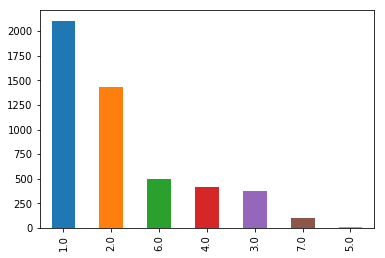

In [79]:
a.plot(kind='bar')

### We see that people mostly prefer 4hrs and 40km hour package the most followed by 8 hrs & 80 kms

11    176
12    176
10    167
9     158
13    142
14    140
17    134
15    119
16    115
8     115
22    112
21     95
18     88
20     83
19     76
23     72
7      46
0      31
1      17
6      17
2      10
3       6
4       5
5       4
Name: booking_created, dtype: int64


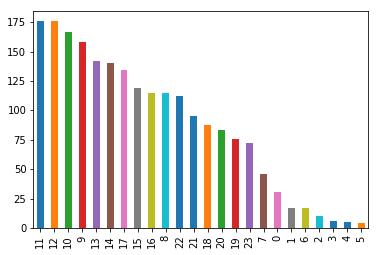

In [87]:
# For hourly with package_id=1, what batch timings most bookings made?
d=hour.booking_created[hour.package_id==1.0].dt.hour.value_counts() # Number of bookings made by time in hour
print(d)
d.plot(kind='bar')

In [90]:
hour.vehicle_model_id[hour.package_id==1.0].value_counts()

12    1803
89     129
85      55
28      55
24      25
65       8
23       7
10       5
17       4
90       4
86       4
87       2
64       2
30       1
Name: vehicle_model_id, dtype: int64

### For package_id=1 (4 hours and 40kms), people prefer, morning and afternoon timing batch with vehicle id 12, 89 mostly demanded

10    123
9     106
11    105
22     95
12     85
20     84
21     82
8      82
23     80
19     77
13     70
14     67
7      66
18     61
16     59
15     57
17     55
0      33
6      13
1      12
5       5
4       5
3       5
2       3
Name: booking_created, dtype: int64


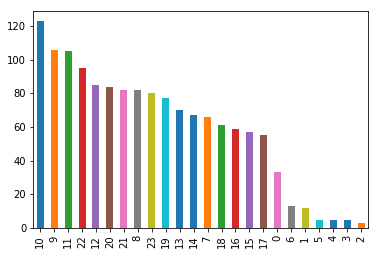

In [91]:
# For hourly with package_id=2, what batch timings most bookings made?
e=hour.booking_created[hour.package_id==2.0].dt.hour.value_counts() # Number of bookings made by time in hour
print(e)
e.plot(kind='bar')

In [93]:
hour.vehicle_model_id[hour.package_id==2.0].value_counts() #Count of vehicles preferred for papckage 2

12    882
65    211
89    105
87     80
85     54
24     31
28     29
30     10
90      7
23      4
10      4
36      3
17      3
64      2
72      2
75      1
86      1
43      1
Name: vehicle_model_id, dtype: int64

### For package_id=2 (8 hours and 80kms), people prefer, morning and afternoon timing batch with vehicle id 12, 65 mostly demanded

In [128]:
# Let us try to find in which package id do we have maximum cancellations
max=0
def count_cancel(i):
    max=0
    k=hour[hour.package_id==i]
    val=k.Car_Cancellation[k.Car_Cancellation==1].value_counts().max()
    if val > max:
        max=val
        id=k.Car_Cancellation[k.Car_Cancellation==1].value_counts().idxmax() 
        return(id)
    return (-1)

for i in range(1,8):
    out=count_cancel(i)
    if out==-1:
        idx=0
    else:
        idx=out
        
out

1

#### This shows that most cancellations occur in package_id=1

In [130]:
hour[(hour.online_booking==1) | (hour.mobile_site_booking==1)].count() #Sum of online and mobile site booking

id                     2307
user_id                2307
vehicle_model_id       2307
package_id             2307
travel_type_id         2307
from_area_id           2307
from_date              2307
to_date                2307
online_booking         2307
mobile_site_booking    2307
booking_created        2307
from_lat               2307
from_long              2307
Car_Cancellation       2307
dtype: int64

In [131]:
hour.shape

(4930, 14)

### This shows that out of 4930 bookings, most bookings are telephonic

## -----------

# HOURLY Package RECAP:
##### >> Here we did not find the earlier findings because of redundancy factor but they are easily computable by changing the codes for above ones.
##### >> Other interestings finds:
##### >> The company can find which package is used and liked more by people and we found that the package offering 4 hrs & 40km was the most booked one.
##### >> Company can benefit from the bar graph showing which timing is most preferred by people selecting different packages and accordingly in the peak times the company can hike the prices.
##### >> Also, for each kind of package what kind of vehicle is preferred can help the company place more vehicles of that type.
##### >> We also saw most cancellations occur in package 1 so the matter can be closely inspected by the company for efficient working.
##### >> It was also seen that most bookings of hourly distance package are made via telephone.

### These points can drastically help the company gain and build customers and optimize its working. 

# ------------------------------------------------------------------------------------------

### This was some basic insight from my side on the given dataset. I have tried to look at various aspects of how different data can help the company gain more insight thus leading to a better and more efficient working. 

#### I hope you loked my work and if used, I hope these insights actually do help XRides. Thanks :)

## Vipul Vaibhav
